In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import json

C:\Users\daire\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\daire\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\daire\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("MetricsOfEarningCallsV2.csv", index_col=0)

In [3]:
df["Date"] = df["year"].astype(str) + "-" + ((df["quarter"]*3) - 1).astype(str).apply(lambda x: x.zfill(2)) + "-01"
df["Date"] = pd.to_datetime(df["Date"])
df["Company"] = df["symbol"].map({
    "AAPL":"Apple",
    "GOOG":"Google",
    "AON":"Aon",
    "C":"Citigroup Inc",
    "CVX":"Chevron Corp.",
    "GS":"Goldman Sachs",
    "JNJ":"Johnson and Johnson",
    "JPM":"J.P. Morgan",
    "META":"META",
    "MSFT":"Microsoft",
    "UNH":"United Healthcare",
    "XOM":"Exxon Mobil Corp",})
df["Type"] = df["symbol"].map({
    "AAPL":"Tech",
    "GOOG": "Tech",
    "AON":"Financial",
    "C":"Financial",
    "CVX":"Other",
    "GS":"Financial",
    "JNJ":"Other",
    "JPM":"Financial",
    "META":"Tech",
    "MSFT":"Tech",
    "UNH":"Other",
    "XOM":"Other",})

<Figure size 3200x1920 with 0 Axes>

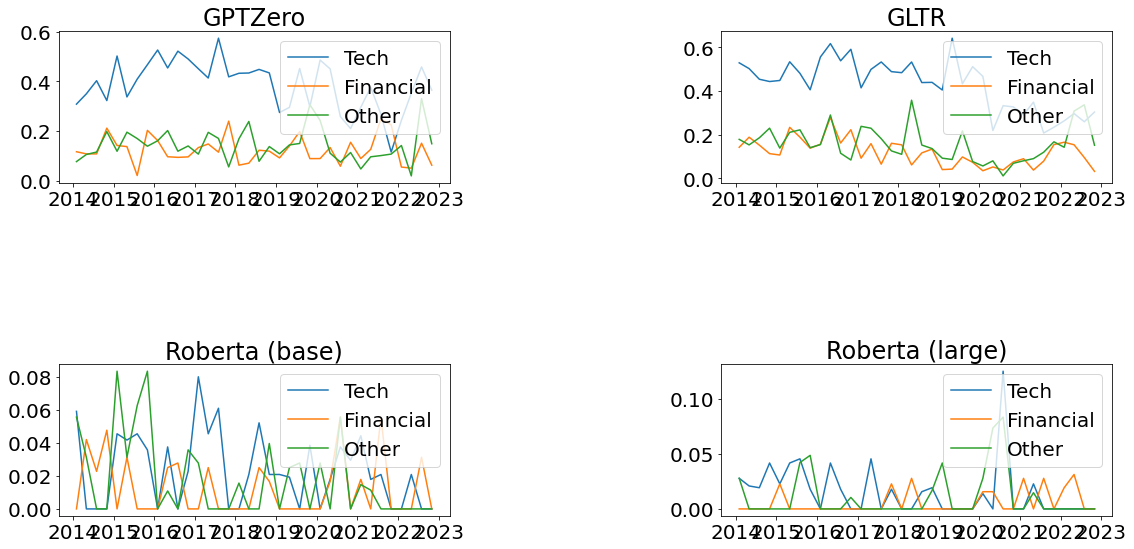

<Figure size 600x400 with 0 Axes>

In [11]:
dfMean = df[df["index"] == "mean"]
dfMean = dfMean[dfMean["year"] > 2013]

dfMean_ = dfMean.groupby(["Type", "Date"]).mean().reset_index()
plt.figure(figsize=(20,12), dpi=160)

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2)

# Data for line graphs
x = dfMean_["Date"]  # X-axis values

tech = dfMean_[dfMean_["Type"] == "Tech"]
fin = dfMean_[dfMean_["Type"] == "Financial"]
other = dfMean_[dfMean_["Type"] == "Other"]

# Plot line graphs with multiple lines
axs[0, 0].plot(tech["Date"], tech["gpt_zero_Label"], label='Tech')
axs[0, 0].plot(fin["Date"], fin["gpt_zero_Label"], label='Financial')
axs[0, 0].plot(other["Date"], other["gpt_zero_Label"], label='Other')
axs[0, 0].set_title('GPTZero')
axs[0, 0].legend()

axs[0, 1].plot(tech["Date"], tech["gltr_Label"], label='Tech')
axs[0, 1].plot(fin["Date"], fin["gltr_Label"], label='Financial')
axs[0, 1].plot(other["Date"], other["gltr_Label"], label='Other')
axs[0, 1].set_title('GLTR')
axs[0, 1].legend()

axs[1, 0].plot(tech["Date"], tech["roberta_Label"], label='Tech')
axs[1, 0].plot(fin["Date"], fin["roberta_Label"], label='Financial')
axs[1, 0].plot(other["Date"], other["roberta_Label"], label='Other')
axs[1, 0].set_title('Roberta (base)')
axs[1, 0].legend()

axs[1, 1].plot(tech["Date"], tech["roberta_large_Label"], label='Tech')
axs[1, 1].plot(fin["Date"], fin["roberta_large_Label"], label='Financial')
axs[1, 1].plot(other["Date"], other["roberta_large_Label"], label='Other')
axs[1, 1].set_title('Roberta (large)')
axs[1, 1].legend()

fig.tight_layout()
plt.gcf().set_size_inches(20, 10)
plt.figure(dpi=100)

#plt.gcf().suptitle("Fig 2. Average Companies Mean Classification Score")
plt.figtext(0, 0.05, "Fig 2. Average Companies Mean Classification Score", horizontalalignment='left', size=14)
plt.rcParams.update({'font.size': 13})

plt.savefig('gridVisualMean.png')

# Show the plot
plt.show()

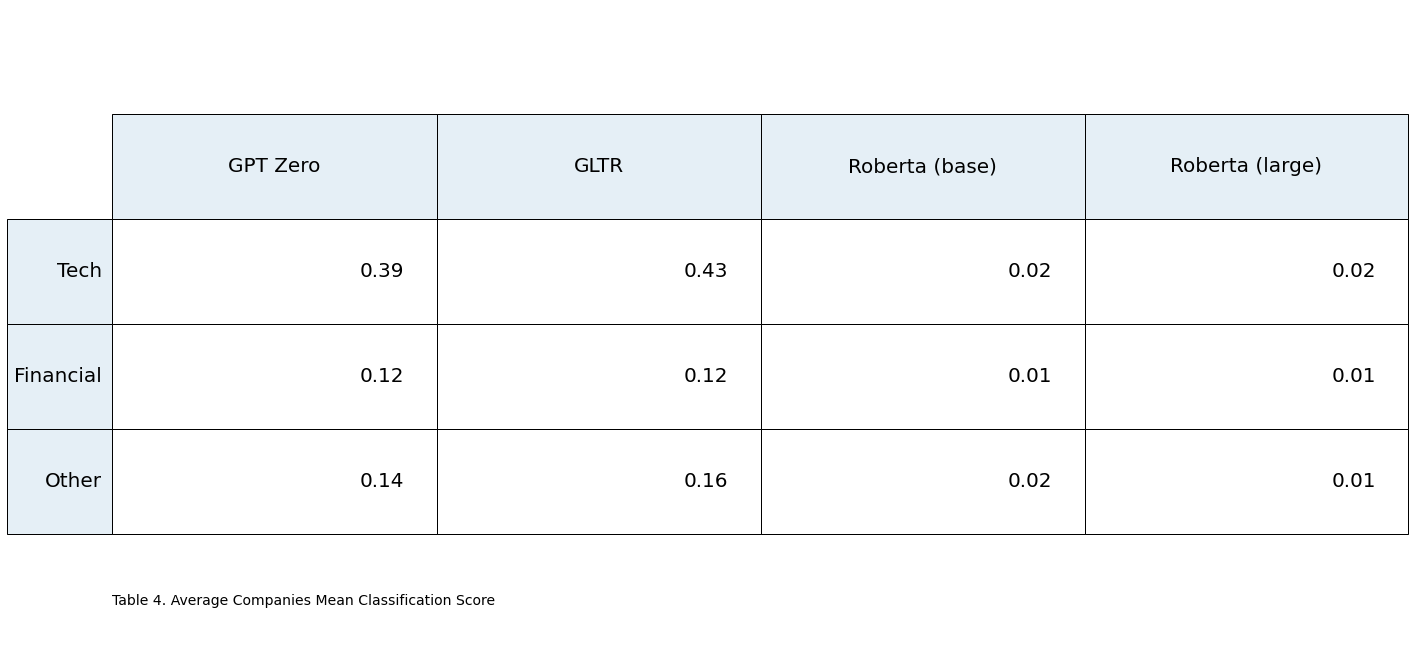

In [18]:
resultsMean = pd.DataFrame()
resultsMean["GPT Zero"] = dfMean.groupby("Type")["gpt_zero_Label"].mean()
resultsMean["GLTR"] = dfMean.groupby("Type")["gltr_Label"].mean()
resultsMean["Roberta (base)"] = dfMean.groupby("Type")["roberta_Label"].mean()
resultsMean["Roberta (large)"] = dfMean.groupby("Type")["roberta_large_Label"].mean()
resultsMean["temp"] = (resultsMean.index).map({"Tech":0, "Financial":1, "Other":2})
resultsMean = resultsMean.sort_values("temp")\
.drop("temp", axis = 1)

for col in resultsMean.columns:
    resultsMean[col] = resultsMean[col].apply(lambda x: round(x, 2))

rcolors = plt.cm.BuPu(np.full(len(resultsMean.index), 0.1))
ccolors = plt.cm.BuPu(np.full(len(resultsMean.columns), 0.1))

the_table = plt.table(cellText=resultsMean.values,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      rowLabels=resultsMean.index,
                      colLabels=resultsMean.columns,
                      loc='center'
                      )
plt.box(on=None)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.subplots_adjust(left=0.0, bottom=0.0)

plt.figtext(0, 0.05, "Table 4. Average Companies Mean Classification Score", horizontalalignment='left', size=14)
plt.gcf().set_size_inches(20, 10)

the_table.scale(1, 3)
plt.rcParams.update({'font.size': 20})

plt.savefig('tableMean.png', bbox_inches="tight")

<Figure size 3200x1920 with 0 Axes>

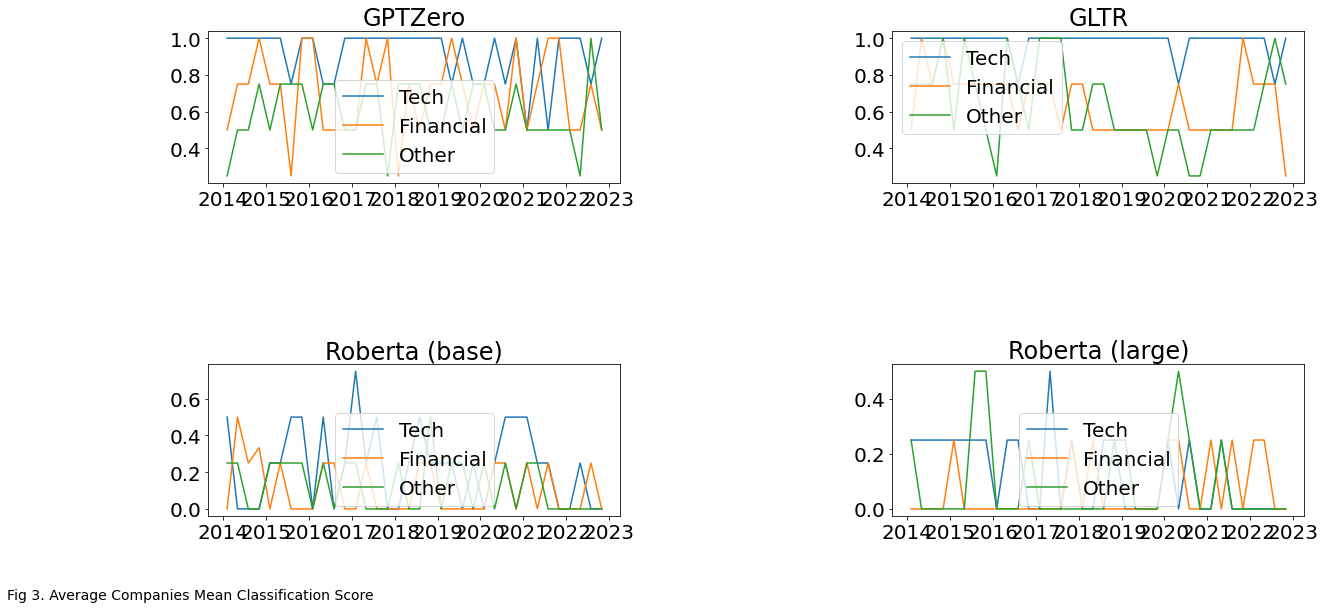

In [21]:
dfMean = df[df["index"] == "max"]
dfMean = dfMean[dfMean["year"] > 2013]

dfMean_ = dfMean.groupby(["Type", "Date"]).mean().reset_index()
plt.figure(figsize=(20,12), dpi=160)

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=2)

# Data for line graphs
x = dfMean_["Date"]  # X-axis values

tech = dfMean_[dfMean_["Type"] == "Tech"]
fin = dfMean_[dfMean_["Type"] == "Financial"]
other = dfMean_[dfMean_["Type"] == "Other"]

# Plot line graphs with multiple lines
axs[0, 0].plot(tech["Date"], tech["gpt_zero_Label"], label='Tech')
axs[0, 0].plot(fin["Date"], fin["gpt_zero_Label"], label='Financial')
axs[0, 0].plot(other["Date"], other["gpt_zero_Label"], label='Other')
axs[0, 0].set_title('GPTZero')
axs[0, 0].legend()

axs[0, 1].plot(tech["Date"], tech["gltr_Label"], label='Tech')
axs[0, 1].plot(fin["Date"], fin["gltr_Label"], label='Financial')
axs[0, 1].plot(other["Date"], other["gltr_Label"], label='Other')
axs[0, 1].set_title('GLTR')
axs[0, 1].legend()

axs[1, 0].plot(tech["Date"], tech["roberta_Label"], label='Tech')
axs[1, 0].plot(fin["Date"], fin["roberta_Label"], label='Financial')
axs[1, 0].plot(other["Date"], other["roberta_Label"], label='Other')
axs[1, 0].set_title('Roberta (base)')
axs[1, 0].legend()

axs[1, 1].plot(tech["Date"], tech["roberta_large_Label"], label='Tech')
axs[1, 1].plot(fin["Date"], fin["roberta_large_Label"], label='Financial')
axs[1, 1].plot(other["Date"], other["roberta_large_Label"], label='Other')
axs[1, 1].set_title('Roberta (large)')
axs[1, 1].legend()

fig.tight_layout()
plt.gcf().set_size_inches(20, 10)

#plt.gcf().suptitle("Fig 3. Average Companies Mean Classification Score")
plt.figtext(0, 0.05, "Fig 3. Average Companies Mean Classification Score", horizontalalignment='left', size=14)

plt.savefig('gridVisualMax.png')
plt.rcParams.update({'font.size': 13})
# Show the plot
plt.show()

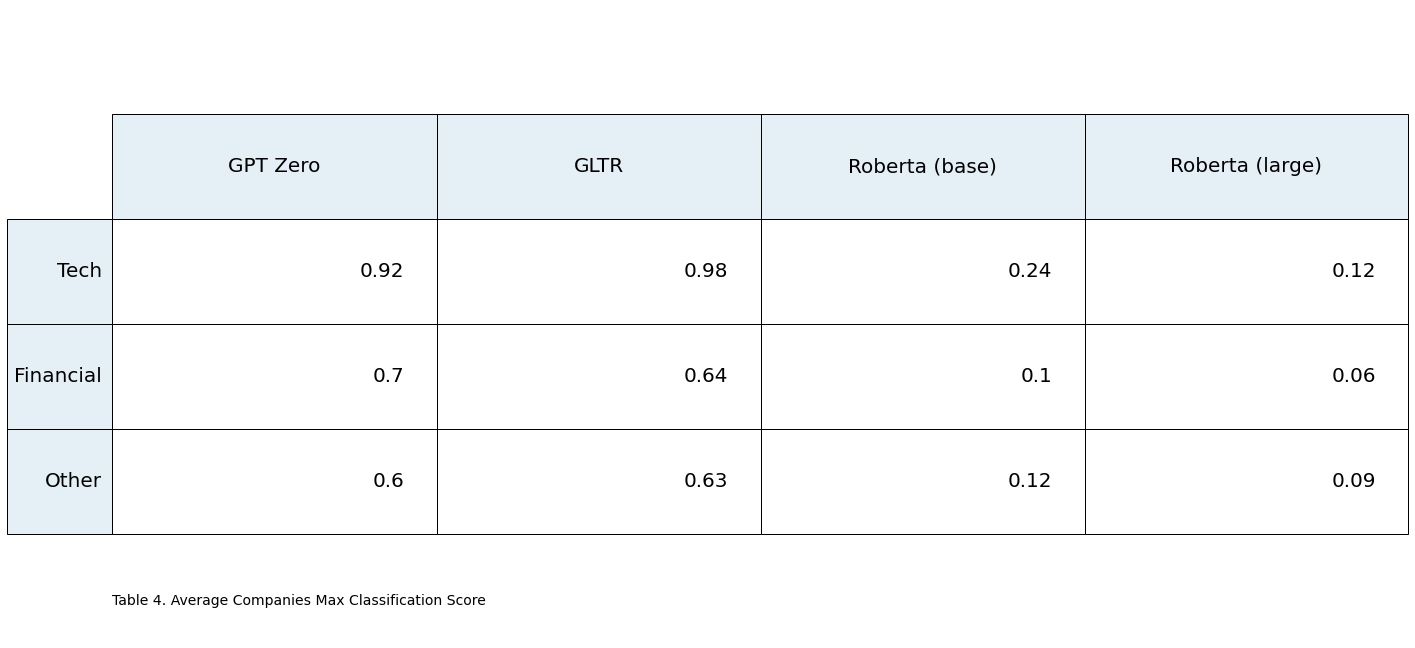

In [23]:
resultsMean = pd.DataFrame()
resultsMean["GPT Zero"] = dfMean.groupby("Type")["gpt_zero_Label"].mean()
resultsMean["GLTR"] = dfMean.groupby("Type")["gltr_Label"].mean()
resultsMean["Roberta (base)"] = dfMean.groupby("Type")["roberta_Label"].mean()
resultsMean["Roberta (large)"] = dfMean.groupby("Type")["roberta_large_Label"].mean()
resultsMean["temp"] = (resultsMean.index).map({"Tech":0, "Financial":1, "Other":2})
resultsMean = resultsMean.sort_values("temp")\
.drop("temp", axis = 1)

for col in resultsMean.columns:
    resultsMean[col] = resultsMean[col].apply(lambda x: round(x, 2))

rcolors = plt.cm.BuPu(np.full(len(resultsMean.index), 0.1))
ccolors = plt.cm.BuPu(np.full(len(resultsMean.columns), 0.1))

the_table = plt.table(cellText=resultsMean.values,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      rowLabels=resultsMean.index,
                      colLabels=resultsMean.columns,
                      loc='center'
                      )
plt.box(on=None)

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.subplots_adjust(left=0.0, bottom=0.0)

plt.figtext(0, 0.05, "Table 4. Average Companies Max Classification Score", horizontalalignment='left', size=14)
plt.gcf().set_size_inches(20, 10)

the_table.scale(1, 3)
plt.rcParams.update({'font.size': 20})

plt.savefig('tableMax.png', bbox_inches="tight")